# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('CA_housing.csv')
dataset = dataset.dropna(axis=0)

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = pd.concat([dataset.iloc[:, :-2], dataset.iloc[:, -1]], axis=1).values
X = np.array(ct.fit_transform(X))
y = dataset.iloc[:, -2:-1].values


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Linear Regression model on the whole dataset

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_poly, y_train)

LinearRegression()

## Visualising the Linear Regression results

In [7]:
# plt.scatter(X, y, color = 'red')
# plt.plot(X, lin_reg.predict(X), color = 'blue')
# plt.title('Truth or Bluff (Linear Regression)')
# plt.xlabel('Position Level')
# plt.ylabel('Salary')
# plt.show()

## Visualising the Polynomial Regression results

In [8]:
# plt.scatter(X, y, color = 'red')
# plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
# plt.title('Truth or Bluff (Polynomial Regression)')
# plt.xlabel('Position level')
# plt.ylabel('Salary')
# plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

In [9]:
# X_grid = np.arange(min(X), max(X), 0.1)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(X, y, color = 'red')
# plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
# plt.title('Truth or Bluff (Polynomial Regression)')
# plt.xlabel('Position level')
# plt.ylabel('Salary')
# plt.show()

## Predicting a new result with Linear Regression

In [10]:
lin_reg.predict([[0.0, 1.0, 0.0, 0.0, 0.0, -121.24, 39.37, 16.0, 2785.0, 616.0,
       1387.0, 530.0, 2.3886]])

array([[66946.23662034]])

## Predicting a new result with Polynomial Regression

In [11]:
lin_reg_2.predict(poly_reg.fit_transform([[0.0, 1.0, 0.0, 0.0, 0.0, -121.24, 39.37, 16.0, 2785.0, 616.0,
       1387.0, 530.0, 2.3886]]))

array([[97624.41378395]])

In [12]:
y[-1]

array([89400.])

In [13]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[157609.82  98900.  ]
 [159046.65 153000.  ]
 [ 97891.76  91300.  ]
 ...
 [163866.06 127000.  ]
 [215175.93 158600.  ]
 [238954.57 175000.  ]]


In [14]:
df = pd.DataFrame(data=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), columns=['Predicted ($)', 'Actual ($)'])
df


,Predicted ($),Actual ($)
0,157609.820878,98900.0
1,159046.651566,153000.0
2,97891.757620,91300.0
3,406353.346883,345200.0
4,345114.538662,344100.0
...,...,...
4082,105093.986540,76300.0
4083,267753.790386,261600.0
4084,163866.063012,127000.0
4085,215175.933484,158600.0


In [15]:
# import dataframe_image as dfi
# dfi.export(df, 'act_pred_poly_4.png', max_rows=5)

In [16]:
px = np.linspace(0, max(y_test), int(max(y_test)))
py = np.linspace(0, max(y_test), int(max(y_test)))

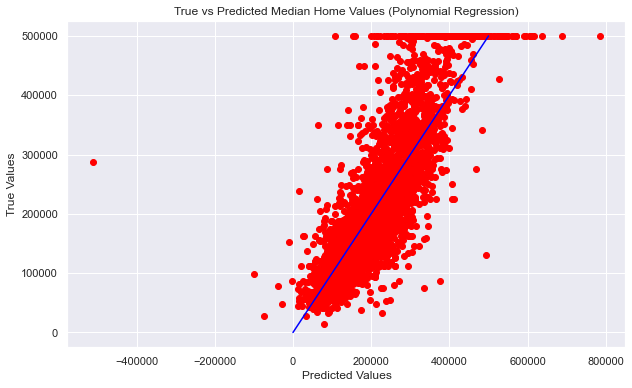

In [17]:
plt.figure(figsize=(10,6))
import seaborn as sns
sns.set()
plt.scatter(y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1), color = 'red')
plt.plot(px, py, color='blue')
plt.title('True vs Predicted Median Home Values (Polynomial Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [18]:
print(lin_reg_2.coef_)
print(lin_reg_2.intercept_)

[[-3.34e-01  3.12e+06  3.17e+06  2.66e+02 -8.87e+06  2.59e+06 -1.74e+05
   2.91e+05 -5.62e+04  7.08e+02 -1.71e+03 -6.92e+02 -5.63e+02 -7.21e+05
   3.12e+06 -3.17e-02  1.90e-01 -4.57e-05 -6.75e-05  2.56e+04  1.04e+05
  -1.80e+04  4.85e+02 -1.84e+03  7.75e+02 -2.53e+03 -1.82e+05  3.17e+06
  -6.46e-05  9.58e-05 -1.42e-04  2.77e+04  1.06e+05 -1.72e+04  4.76e+02
  -1.84e+03  7.99e+02 -2.53e+03 -1.77e+05  2.63e+02  1.99e-05  1.09e-05
  -3.11e+04  8.77e+03  1.53e+04 -1.24e+03  5.63e+03 -3.83e+03  9.70e+03
   6.09e+02 -8.87e+06  2.76e-06 -2.12e+05 -2.92e+04 -1.82e+04  4.96e+02
  -1.81e+03  7.72e+02 -2.61e+03 -1.82e+05  2.59e+06  1.57e+04  1.01e+05
  -1.80e+04  4.89e+02 -1.84e+03  7.91e+02 -2.59e+03 -1.80e+05 -7.13e+01
   4.63e+03 -9.18e+02  1.50e+01 -5.55e+01  2.95e+00 -3.21e+01 -1.15e+04
   2.75e+03 -1.05e+03  1.56e+01 -7.81e+01  7.35e+00 -2.44e+01 -1.20e+04
   2.14e+01 -2.10e-01  2.76e+00 -1.36e+00  3.09e+00  1.62e+02 -1.68e-03
   3.04e-02 -5.45e-03  5.52e-03  8.89e+00 -1.59e-01  2.88e-02  2

In [19]:
from sklearn.metrics import r2_score
print('R2: ', r2_score(y_test, y_pred))
print('Adjusted R2: ', 1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

R2:  0.7012112274670609
Adjusted R2:  0.7002575682372725


In [20]:
from sklearn.metrics import mean_squared_error
import math
mean_squared_error(y_test, y_pred, squared=False)

63250.990931831286